In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

df = pd.read_csv('accidents_2017_to_2023_english.csv')

print("Dataset Features")
print(df.info()) 
# print(df.describe())

# temporal data includes inverse_data, week_day, hour, weather_timestamp
# goal? what are the most dangerous areas in Brazil in regards to motor vehicle accidents?
# maybe which time of day, season, day of the week is the most dangerous?
# visualize fatal vs nonfatal accidents 
print("\nTotal number of data points in this dataset:", len(df))

print("\nSample Data Points:")
print(df.sample(5))  

Dataset Features
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people           

In [3]:
# remember this dataset was translated from its original language
# road_direction feature is kind of unclear? what does increasing vs decreasing mean?
# cause_of_accident has value "Incompatible velocity". Speeding?
# road_delineation also has missing values that are described as "Not Reported"
# regional feature contains values like "SPRF-PR", meaning?
# police_station doesn't seem particularly useful/relevant

print(df['road_delineation'].unique())
print(df['police_station'].unique())
print(df['regional'].unique()) # states? redundant? 
print(df['cause_of_accident'].nunique())

['Straight' 'Curve' 'Temporary Detour' 'Not Reported' 'Intersection'
 'Authorized U-turn' 'Overpass' 'Roundabout' 'Bridge' 'Tunnel']
['DEL05-RS' 'DEL01-PR' 'DEL01-BA' 'DEL01-PA' 'DEL02-DF' 'DEL04-RN'
 'DEL07-PR' 'DEL08-MG' 'DEL01-MT' 'DEL02-MA' 'DEL02-SE' 'DEL04-MA'
 'DEL09-SP' 'DEL04-MG' 'DEL02-TO' 'DEL01-PE' 'DEL01-ES' 'DEL10-BA'
 'DEL07-MG' 'DEL02-AL' 'DEL03-SC' 'DEL01-PB' 'DEL02-PE' 'DEL03-RO'
 'DEL05-CE' 'DEL01-MG' 'DEL03-MG' 'DEL16-MG' 'DEL15-MG' 'DEL07-SC'
 'DEL01-MA' 'DEL12-MG' 'DEL03-AL' 'DEL05-SP' 'DEL02-MG' 'DEL04-SC'
 'DEL03-PR' 'DEL04-BA' 'DEL03-CE' 'DEL02-RJ' 'DEL03-GO' 'DEL02-PB'
 'DEL02-SP' 'DEL01-RJ' 'DEL05-MG' 'DEL01-CE' 'DEL02-GO' 'DEL04-CE'
 'DEL01-MS' 'DEL06-SP' 'DEL05-SC' 'DEL08-SP' 'DEL02-SC' 'DEL06-PR'
 'DEL04-RS' 'DEL03-RS' 'DEL06-RS' 'DEL05-RJ' 'DEL04-RO' 'DEL02-CE'
 'DEL04-ES' 'DEL05-BA' 'DEL02-MT' 'DEL08-RS' 'DEL02-RS' 'DEL06-RJ'
 'DEL06-SC' 'DEL07-RJ' 'DEL03-SP' 'DEL04-SP' 'DEL11-MG' 'DEL07-BA'
 'DEL01-AL' 'DEL09-MG' 'DEL03-BA' 'DEL06-GO' 'DEL03-PI' 'DEL03-

In [4]:
print(df['week_day'].value_counts())
print('\n')
# print(df['hour'].value_counts())
# print('\n')
print(df['inverse_data'].nunique()) # number of unique dates = 2434
print(df['weather_timestamp'].unique())


week_day
saturday     77133
sunday       76960
friday       71435
monday       62816
thursday     60329
wednesday    57878
tuesday      56601
Name: count, dtype: int64


2434
['Night' 'Sunrise' 'Day' 'Sunset']


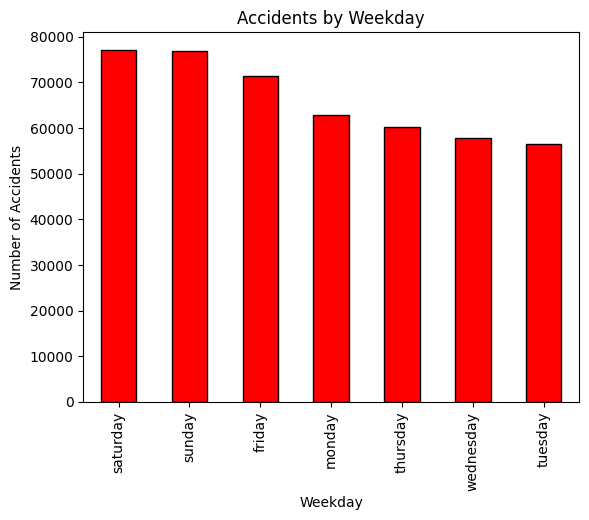

In [7]:
# visualize the number of accidents per weekday using a bar chart

weekday = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
df['week_day'].value_counts().plot(kind='bar', color='red' , edgecolor='black')
plt.title('Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Accidents')
plt.show()



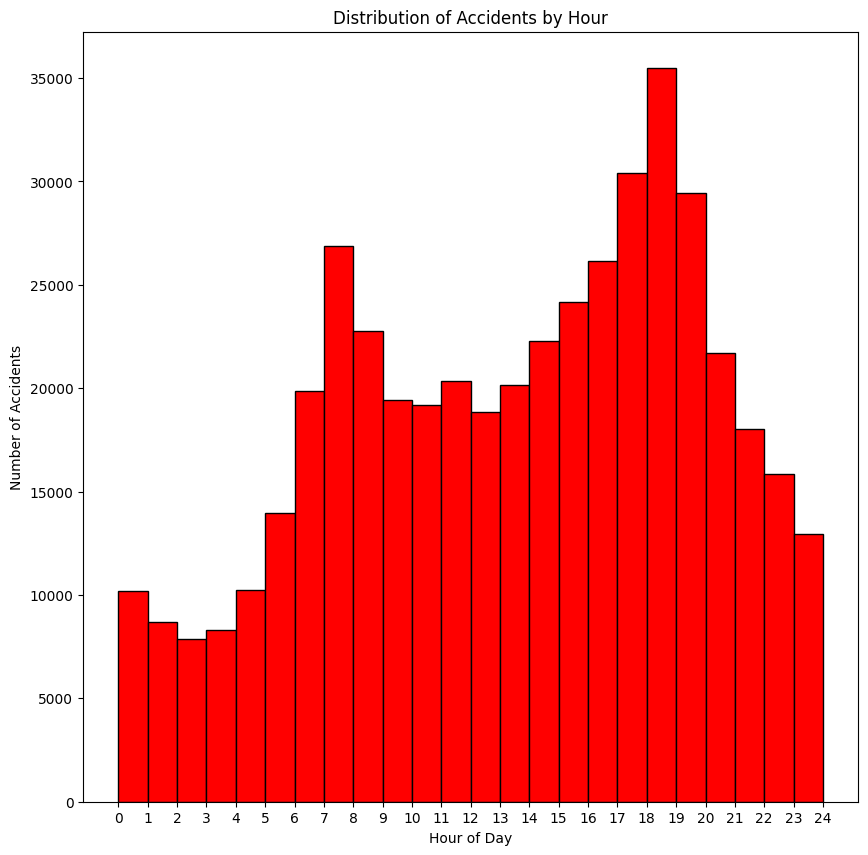

In [8]:
# format hour column as datetime object and extract hour
df['hour_numeric'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 10))
plt.hist(df['hour_numeric'], bins=24, range=(0, 24), color='red', edgecolor="black" )
plt.title("Distribution of Accidents by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 25))
plt.show()

Total accidents during Carnival weeks: 10775 

Accidents during Carnival weeks by year:
inverse_data
2017    1744
2018    1920
2019    1512
2020    1597
2021    1425
2022    1160
2023    1417
Name: count, dtype: int64


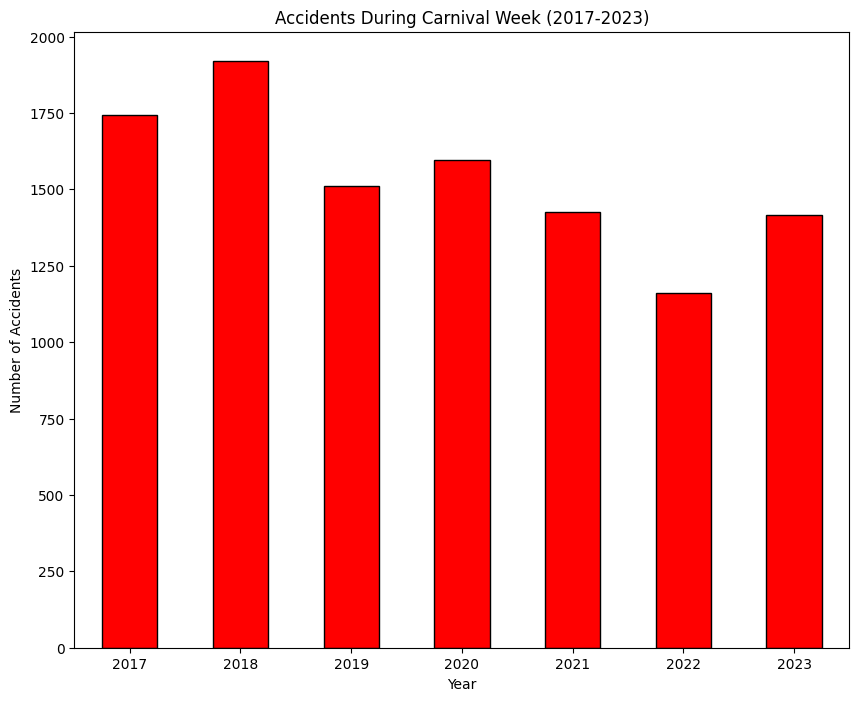

In [5]:
# dictionary that includes the week ending on Ash Wednesday for that year

carnival_weeks = {
    2017: ('2017-02-24', '2017-03-01'),
    2018: ('2018-02-07', '2018-02-14'),
    2019: ('2019-02-27', '2019-03-06'),
    2020: ('2020-02-19', '2020-02-26'),
    2021: ('2021-02-10', '2021-02-17'),
    2022: ('2022-02-25', '2022-03-02'),
    2023: ('2023-02-15', '2023-02-22')
}

# convert dictionary string values above to pandas datetime objects 
for week in carnival_weeks:
    start, end = carnival_weeks[week]
    carnival_weeks[week] = (pd.to_datetime(start), pd.to_datetime(end))

# print(carnival_week)

# convert the dates of car accidents to pandas datetime objects
df['inverse_data'] = pd.to_datetime(df['inverse_data'])

# check if the date of an accident occurs during Carnival week
def is_carnival_week(date):
    for start_date, end_date in carnival_weeks.values():
        if start_date <= date <= end_date:
            return True
    return False
    
df['is_carnival'] = df['inverse_data'].apply(is_carnival_week)

# only include rows where is_carnival is True
carnival_accidents = df[df['is_carnival']]

# count the number of rows in the new df  
total_carnival_accidents = len(carnival_accidents)
print(f"Total accidents during Carnival weeks: {total_carnival_accidents} \n")

# group by year and count the number of accidents that occurred during carnival week in that year
# sort by year in ascending order
carnival_accidents_by_year = carnival_accidents['inverse_data'].dt.year.value_counts().sort_index()

print("Accidents during Carnival weeks by year:")
print(carnival_accidents_by_year)

# bar chart of accidents during carnival weeks by year
plt.figure(figsize=(10, 8))
carnival_accidents_by_year.plot(kind='bar', color='red', edgecolor='black')
plt.title("Accidents During Carnival Week (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()


      Carnival Accidents  Average Non-Carnival Accidents
Year                                                    
2017                1744                     1722.019608
2018                1920                     1321.803922
2019                1512                     1294.980392
2020                1597                     1215.274510
2021                1425                     1237.529412
2022                1160                     1242.882353
2023                1417                      835.647059


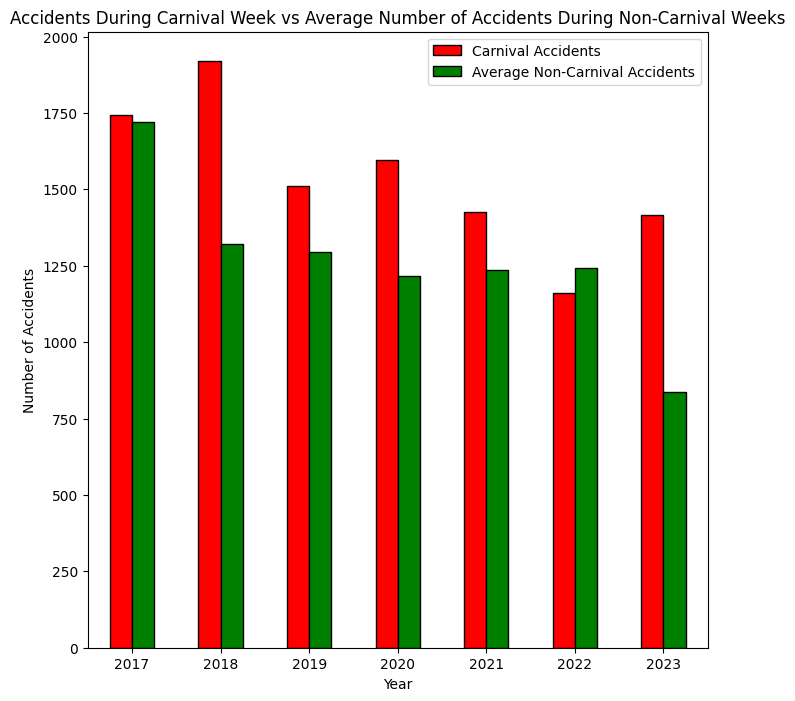

In [14]:
# convert the dates of car accidents to pandas datetime objects
df['inverse_data'] = pd.to_datetime(df['inverse_data'])

# count the number of accidents for each year
carnival_accidents_by_year = carnival_accidents['inverse_data'].dt.year.value_counts().sort_index()

total_accidents_by_year = df['inverse_data'].dt.year.value_counts().sort_index()

non_carnival_accidents_by_year = total_accidents_by_year - carnival_accidents_by_year

# average number of accidents per non Carnival week for each year
avg_non_carnival_accidents_by_year = non_carnival_accidents_by_year / 51

carnival_vs_non_carnival_df = pd.DataFrame({
    'Carnival Accidents': carnival_accidents_by_year,
    'Average Non-Carnival Accidents': avg_non_carnival_accidents_by_year
})
carnival_vs_non_carnival_df = carnival_vs_non_carnival_df.rename_axis("Year")
print(carnival_vs_non_carnival_df)


carnival_vs_non_carnival_df.plot(kind='bar', color=['red', 'green'], figsize=(8, 8), edgecolor='black')
plt.title("Accidents During Carnival Week vs Average Number of Accidents During Non-Carnival Weeks")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

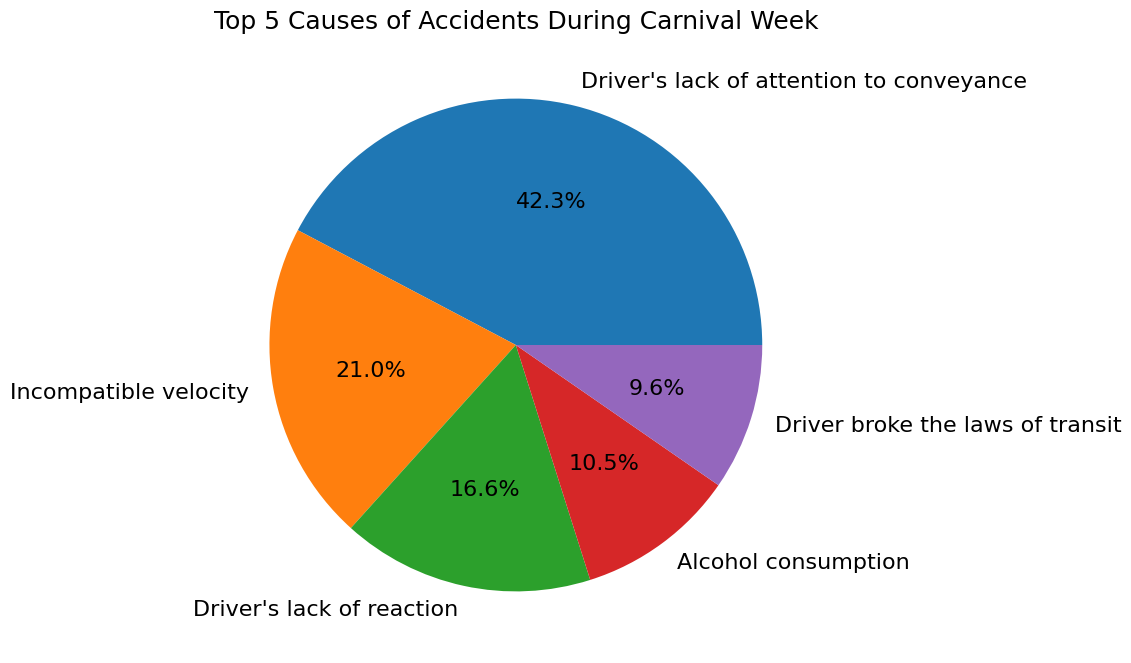

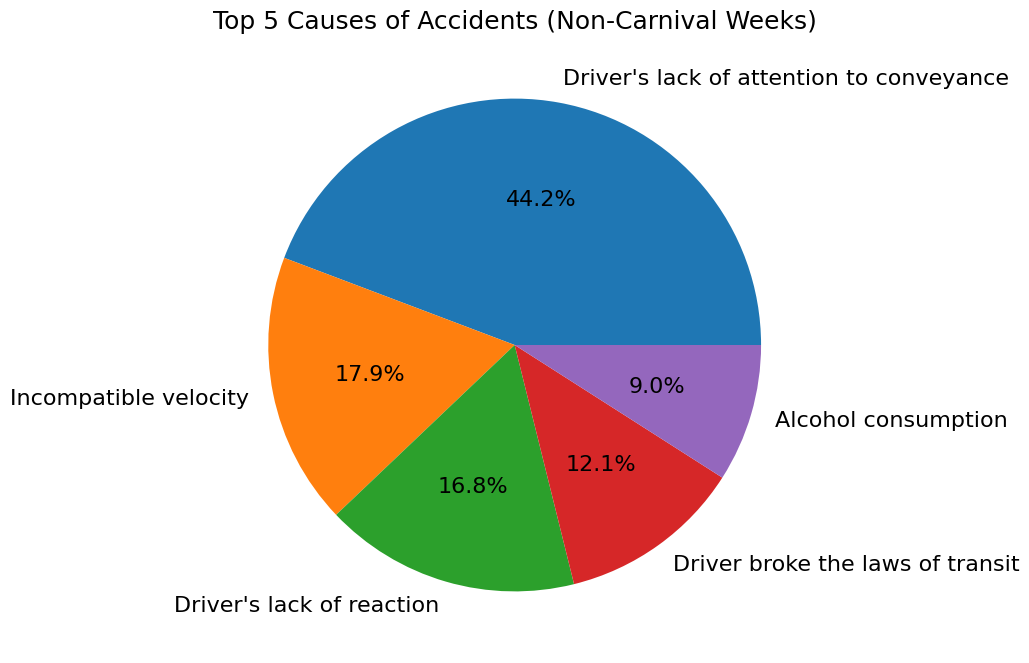

Top 5 Causes During Carnival Week:
cause_of_accident
Driver's lack of attention to conveyance    2335
Incompatible velocity                       1162
Driver's lack of reaction                    914
Alcohol consumption                          579
Driver broke the laws of transit             532
Name: count, dtype: int64

Top 5 Causes During Non-Carnival Weeks:
cause_of_accident
Driver's lack of attention to conveyance    105453
Incompatible velocity                        42560
Driver's lack of reaction                    39974
Driver broke the laws of transit             28787
Alcohol consumption                          21562
Name: count, dtype: int64


In [16]:
# get and display the top 5 causes of accidents that occurred during Carnival
causes_count = carnival_accidents['cause_of_accident'].value_counts()
top_5_causes_carnival = causes_count.head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_5_causes_carnival, 
    labels=top_5_causes_carnival.index, 
    autopct='%1.1f%%', 
    textprops={'fontsize': 16}
)
plt.title('Top 5 Causes of Accidents During Carnival Week', fontsize=18)
plt.show()

#print(carnival_accidents['cause_of_accident'].nunique())
#print(carnival_accidents['victims_condition'].unique())

non_carnival_accidents = df[df['is_carnival'] == False]
top_5_causes_non_carnival = non_carnival_accidents['cause_of_accident'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    top_5_causes_non_carnival,
    labels=top_5_causes_non_carnival.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 16},
)
plt.title("Top 5 Causes of Accidents (Non-Carnival Weeks)", fontsize=18)
plt.show()

print("Top 5 Causes During Carnival Week:")
print(top_5_causes_carnival)
print("\nTop 5 Causes During Non-Carnival Weeks:")
print(top_5_causes_non_carnival)


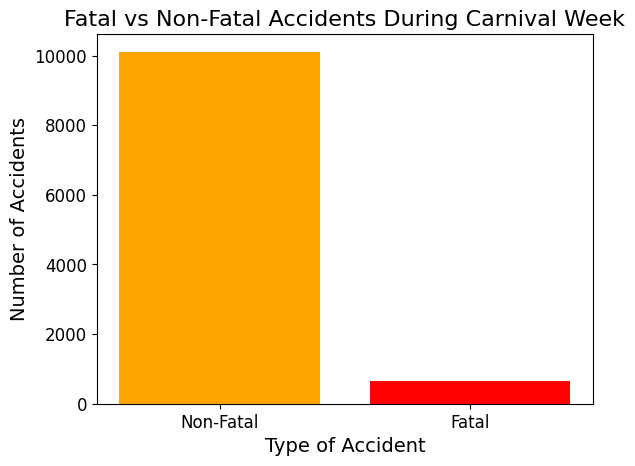

Non-Fatal    10109
Fatal          666
Name: count, dtype: int64


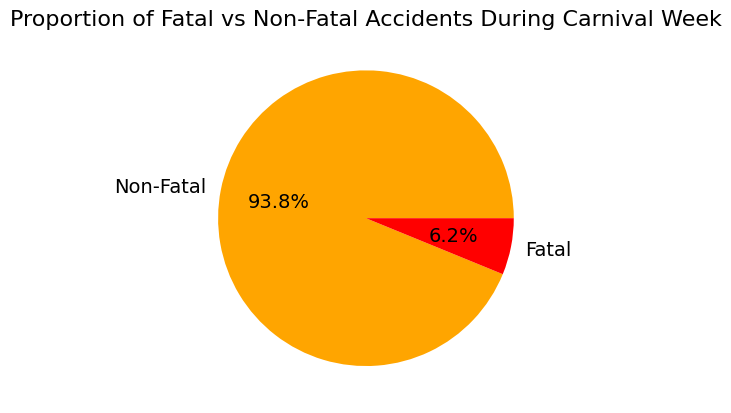

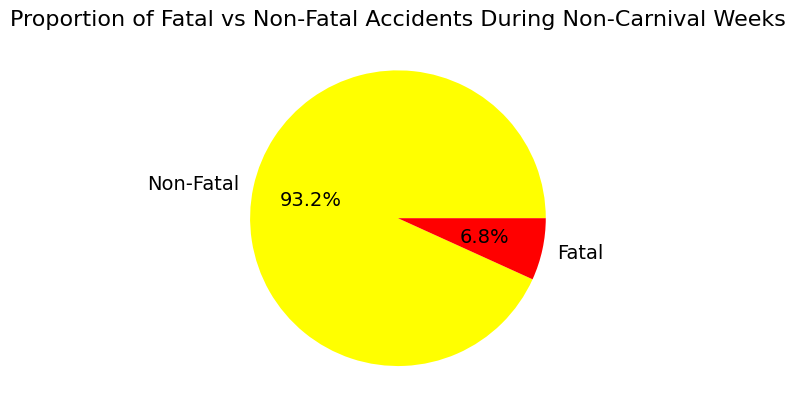

In [25]:
carnival_accidents = carnival_accidents.copy()

# create is_fatal column, true if there are dead victims
carnival_accidents['is_fatal'] = carnival_accidents['victims_condition'] == 'With dead victims'

# count fatal & non fatal accidents during Carnival week
fatal_vs_nonfatal_count = carnival_accidents['is_fatal'].value_counts()
fatal_vs_nonfatal_count.index = ['Non-Fatal', 'Fatal']  

# count fatal & non fatal accidents during non-Carnival weeks for comparison
# non_carnival_accidents = df[df['is_carnival'] == False
non_carnival_accidents['is_fatal'] = non_carnival_accidents['victims_condition'] == 'With dead victims'
fatal_vs_nonfatal_count_non_carnival = non_carnival_accidents['is_fatal'].value_counts()
fatal_vs_nonfatal_count_non_carnival.index = ['Non-Fatal', 'Fatal'] 


plt.bar(fatal_vs_nonfatal_count.index, fatal_vs_nonfatal_count.values, color=['orange', 'red'])
plt.title("Fatal vs Non-Fatal Accidents During Carnival Week", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=14)
plt.xlabel("Type of Accident", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print(fatal_vs_nonfatal_count)

plt.title("Proportion of Fatal vs Non-Fatal Accidents During Carnival Week", fontsize=16)
plt.pie(
    fatal_vs_nonfatal_count, 
    labels=fatal_vs_nonfatal_count.index, 
    autopct='%1.1f%%', 
    colors=['orange', 'red'], 
    textprops={'fontsize': 14}
)

plt.show()

# no bar graph for non carnival weeks because there are way more data points compared to Carnival week, compare proportionality instead
plt.title("Proportion of Fatal vs Non-Fatal Accidents During Non-Carnival Weeks", fontsize=16)
plt.pie(
    fatal_vs_nonfatal_count_non_carnival, 
    labels=fatal_vs_nonfatal_count_non_carnival.index, 
    autopct='%1.1f%%', 
    colors=['yellow', 'red'], 
    textprops={'fontsize': 14}
)
plt.show()



In [6]:
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import display

# make sure that the data points are roughly within Brazil
latitude_range = (-34.0, 5.3)
longitude_range = (-73.9, -34.8)

df = df[
    (df['latitude'] >= latitude_range[0]) &
    (df['latitude'] <= latitude_range[1]) &
    (df['longitude'] >= longitude_range[0]) &
    (df['longitude'] <= longitude_range[1])
]
        
# center map on Brazil
brazil_map = folium.Map(location=[-14, -51], zoom_start=5)


# cluster these data points 
marker_cluster = MarkerCluster().add_to(brazil_map)

# add data points to marker cluster
for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Date of Accident:{row['inverse_data']} \n"
            f"Latitude:{row['latitude']} \n"
            f"Longitude: {row['longitude']}"
        )
    ).add_to(marker_cluster)


heat_data = df[['latitude', 'longitude']].values.tolist()

HeatMap(heat_data, radius=10).add_to(brazil_map)

# display makes the file too big
#display(brazil_map)
brazil_map.save("accidents_map.html")

In [194]:
""" Summer: December 21st to March 20th
Autumn: March 21st to June 20th
Winter: June 21st to September 20th
Spring: September 21st to December 20th """

def get_season(date):
    month = date.month
    day = date.day
    
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day <= 20):
        return "Summer"
    elif (month == 3 and day >= 21) or (month in [4, 5]) or (month == 6 and day <= 20):
        return "Autumn"
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day <= 20):
        return "Winter"
    elif (month == 9 and day >= 21) or (month in [10, 11]) or (month == 12 and day <= 20):
        return "Spring"


df['season'] = df['inverse_data'].apply(get_season)

# print(df[['inverse_data', 'season']].sample(20))
print(df['season'].value_counts())


season
Summer    119827
Winter    118383
Autumn    117586
Spring    107297
Name: count, dtype: int64


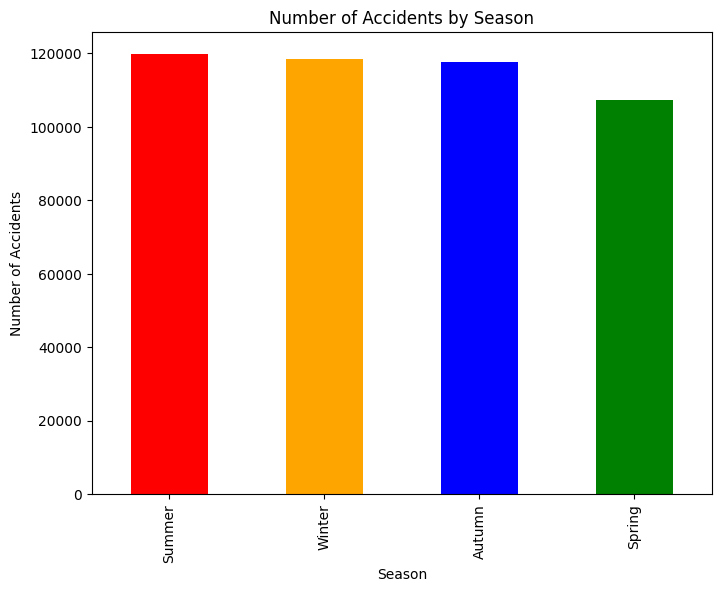

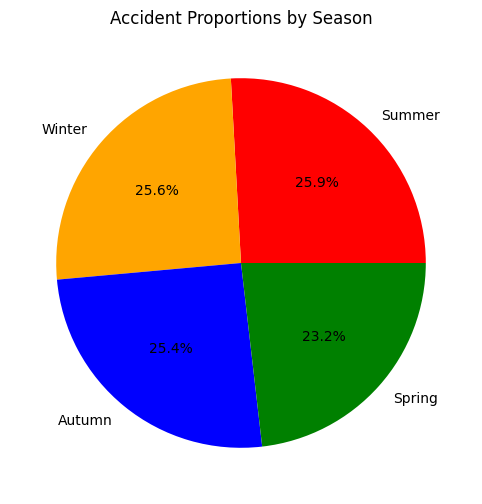

In [195]:
# count accidents by season
season_counts = df['season'].value_counts()

season_counts.plot(kind='bar', color=['red', 'orange', 'blue', 'green'], figsize=(8, 6))
plt.title('Number of Accidents by Season')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.show()

season_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'blue', 'green'], figsize=(8, 6))
plt.title('Accident Proportions by Season')
plt.ylabel('')
plt.show()


In [196]:
winter_accidents = df[df['season'] == 'Winter']

# cluster data points using marker cluster
marker_cluster = MarkerCluster().add_to(brazil_map)

# add data points to marker cluster
for _, row in winter_accidents.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Date: {row['inverse_data']} /n Cause: {row['cause_of_accident']}",
    ).add_to(marker_cluster)
winter_map.save("winter_accidents_map.html")
# not really useful, looks too similar to map above

Least Common Causes of Accidents:
cause_of_accident
inefficiency of the drenage system            4
suicide (presumed)                            5
mental disorder (except suicide)              6
robbery attempt                              10
hidden/covered sinalization (of the road)    11
Name: count, dtype: int64
Top States for Each Least Common Cause:
                           cause_of_accident state  count
0  hidden/covered sinalization (of the road)    RJ      3
1         inefficiency of the drenage system    MG      2
2           mental disorder (except suicide)    MS      2
3                            robbery attempt    RJ      4
4                         suicide (presumed)    AL      1


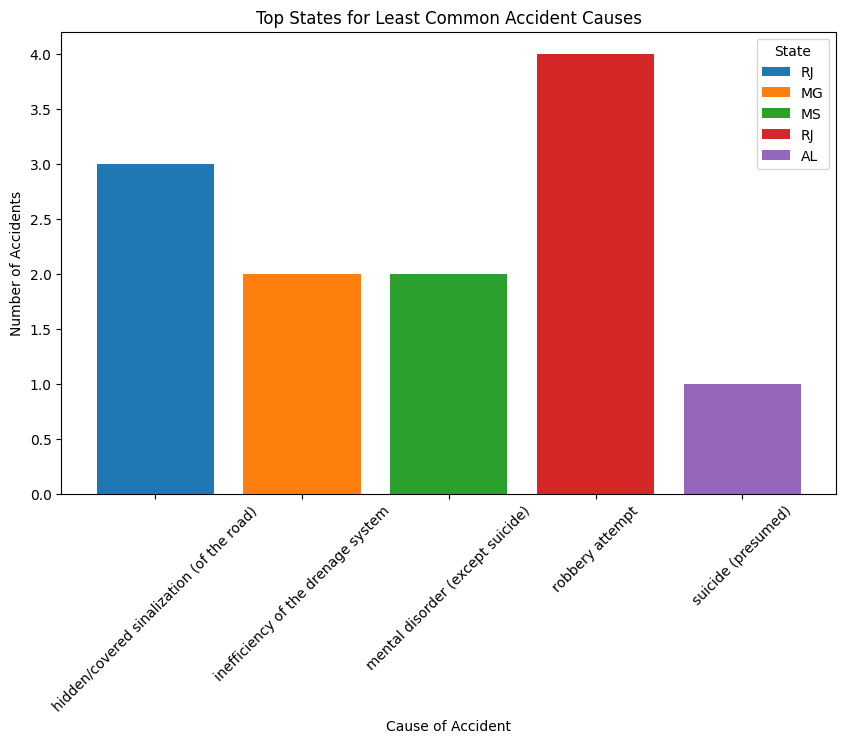

In [26]:
# where do the least common causes of accidents happen the most?

# identify least common causes of accidents
least_common_causes = df['cause_of_accident'].value_counts().nsmallest(5)
print("Least Common Causes of Accidents:")
print(least_common_causes)

# grab the rows with these least common causes
least_df = df[df['cause_of_accident'].isin(least_common_causes.index)]

# group by cause and state to find the most frequent state for each cause
state_summary = (
    least_df.groupby(['cause_of_accident', 'state'])
    .size()
    .reset_index(name='count')
    .sort_values(['cause_of_accident', 'count'], ascending=[True, False])
)

# get the top state for each cause
top_states_per_cause = state_summary.groupby('cause_of_accident').first().reset_index()
print("Top States for Each Least Common Cause:")
print(top_states_per_cause)

plt.figure(figsize=(10, 6))
for index, row in top_states_per_cause.iterrows():
    plt.bar(row['cause_of_accident'], row['count'], label=row['state'])

plt.xticks(rotation=45)
plt.title("Top States for Least Common Accident Causes")
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Accidents")
plt.legend(title="State")
plt.show()

# again not really useful, not enough data points